In [1]:
#Libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics



In [24]:
#Loading Data
df= pd.read_csv("winequality-white.csv", sep=';')

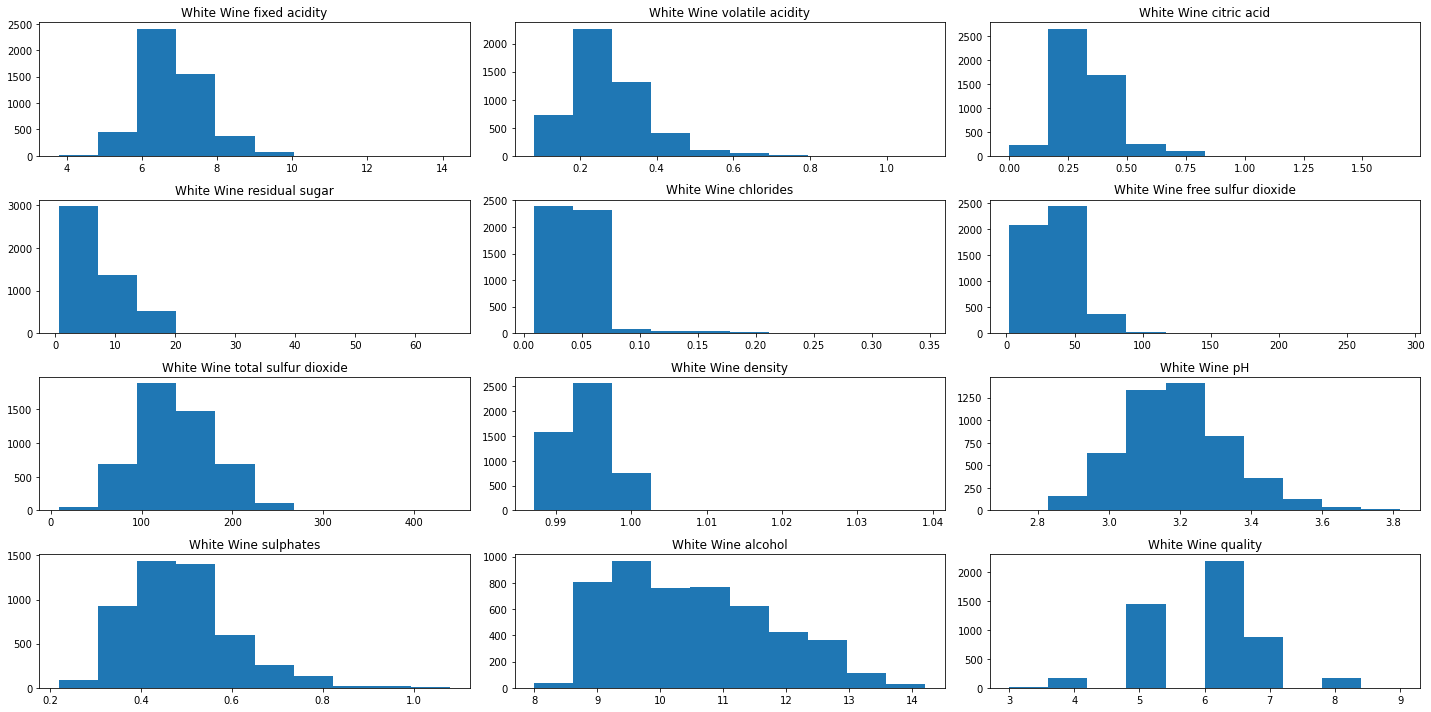

In [3]:
#Exploring Data
#Red Wine Normaility Distribution
fig = plt.figure(figsize = [20,10])
cols = df.columns
count = 1
for col in cols:
    plt.subplot(4,3,count)
    count+=1
    plt.hist(df[col])
    plt.title("White Wine " + col)
plt.tight_layout()
plt.show()

In [4]:
#getting inputs and target
X = df.values[:, 0:11]
Y = df.values[:, 11]
m = len(Y)

### Data Preprocessing

In [13]:
#Train, Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42,shuffle=True) 

#Z scaling
#create a scaler object
std_scaler = StandardScaler()
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train))
X_test = pd.DataFrame(std_scaler.fit_transform(X_test))
X_val = pd.DataFrame(std_scaler.fit_transform(X_val))

In [14]:
error_baseline = sum(Y)/m

In [15]:
print(error_baseline)

5.87790935075541


In [16]:
#sklearn Ridge 
clf = Ridge(alpha=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(clf.score(X_test, Y_test, sample_weight=None))


0.2657694622429886


In [17]:
#sklearn Ridge with builtin cross validation
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)
Y_pred = clf.predict(X)
print(clf.score(X_test, Y_test, sample_weight=None))


0.26576946224333864


In [18]:
#LASSO WITH CROSS VALIDATION
reg = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)


#LASSO
clf = Lasso(alpha=0.1)
clf.fit(X,Y)
print(clf.score(X, Y))


0.28376349700785497
[ 0.06001879 -0.19138662  0.          0.42140461  0.00127488  0.09736381
 -0.0005257  -0.51650067  0.11651758  0.08417995  0.18532883]
0.20287715634451753


### Feature Selection with LASSO
### These features contribute significantly: residual sugar> alcohol > density> volatile acidity> pH 
3,10,7, 1,8

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [20]:
#Elastic Net with CV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, Y_train)
print(regr.alpha_)
print(regr.score(X_test, Y_test))

#ElasticNet 
regr = ElasticNet(random_state=0)
regr.fit(X, Y)
print(regr.score(X, Y))

0.0012322250831521928
0.26491787460620975
0.049118774751079175


### Better Model
#### Of the three, Ridge Regression with cross validation is the best
#### Focus of using Ridge Regression with CV during hyperparameter tuning

In [23]:
Xr_train = X_train[[3,10,7, 1,8]]
Xr_test = X_test[[3,10,7, 1,8]]
Xr_val = X_val[[3,10,7, 1,8]]

r_alphas = np.logspace(-3, 2, 100)

clf = RidgeCV(alphas=r_alphas, scoring='r2').fit(X_train, Y_train)
print(clf.score(X_test, Y_test, sample_weight=None))
print(clf.alpha_)
print(r_alphas)

0.26550472726223384
2.1544346900318843
[1.00000000e-03 1.12332403e-03 1.26185688e-03 1.41747416e-03
 1.59228279e-03 1.78864953e-03 2.00923300e-03 2.25701972e-03
 2.53536449e-03 2.84803587e-03 3.19926714e-03 3.59381366e-03
 4.03701726e-03 4.53487851e-03 5.09413801e-03 5.72236766e-03
 6.42807312e-03 7.22080902e-03 8.11130831e-03 9.11162756e-03
 1.02353102e-02 1.14975700e-02 1.29154967e-02 1.45082878e-02
 1.62975083e-02 1.83073828e-02 2.05651231e-02 2.31012970e-02
 2.59502421e-02 2.91505306e-02 3.27454916e-02 3.67837977e-02
 4.13201240e-02 4.64158883e-02 5.21400829e-02 5.85702082e-02
 6.57933225e-02 7.39072203e-02 8.30217568e-02 9.32603347e-02
 1.04761575e-01 1.17681195e-01 1.32194115e-01 1.48496826e-01
 1.66810054e-01 1.87381742e-01 2.10490414e-01 2.36448941e-01
 2.65608778e-01 2.98364724e-01 3.35160265e-01 3.76493581e-01
 4.22924287e-01 4.75081016e-01 5.33669923e-01 5.99484250e-01
 6.73415066e-01 7.56463328e-01 8.49753436e-01 9.54548457e-01
 1.07226722e+00 1.20450354e+00 1.35304777e+00 

### Hyperparameter tuning:
#### alphas, features, regression type